Attribute Information:

Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, classification_report


# Reading the dataset

In [2]:
df=pd.read_csv("breast cancer data set.csv")

# Analyzing the data for null values and dropping the rows having an empty value

In [3]:
df.head(7)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN


In [4]:
df.dropna()
df.drop(['Unnamed: 32'],axis= 1,inplace=True)

In [5]:
label_encoder = preprocessing.LabelEncoder() 
   
df['diagnosis']= label_encoder.fit_transform(df['diagnosis']) 
  
df['diagnosis'].unique() 

array([1, 0])

In [6]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
df.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


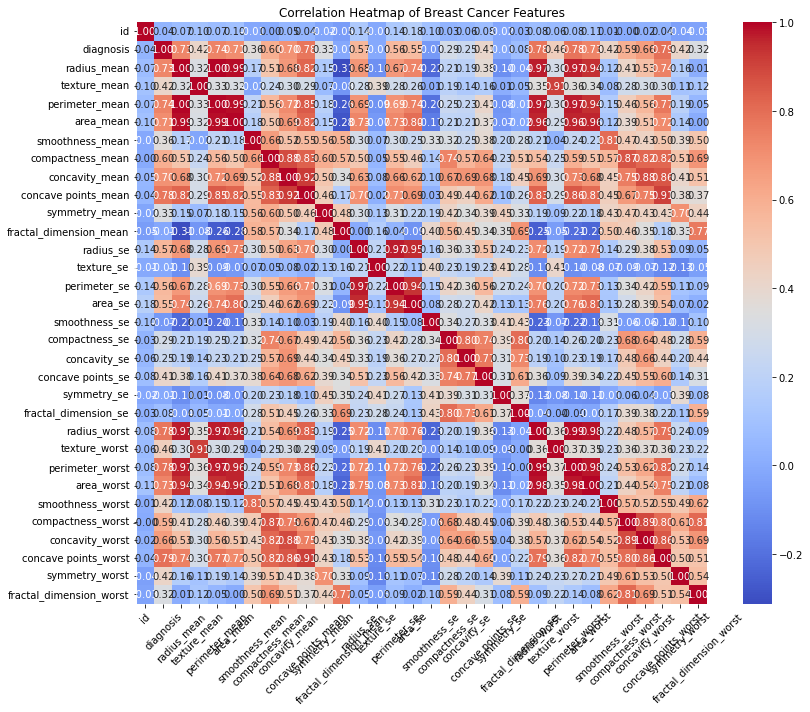

In [9]:
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Customize the plot (optional)
plt.title('Correlation Heatmap of Breast Cancer Features')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()


# We will predict wether the tumor is Malignant or Benign on the basis of radius,texture,smoothness,compactness, and concavity

In [10]:
X=df[["radius_mean","texture_mean","smoothness_mean","compactness_mean","concavity_mean"]]

In [11]:
y=df["diagnosis"]

# Splitting the data for training and testing

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)

# Using the model of KNN

In [46]:
#KNN Normal
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
knn = KNeighborsClassifier(n_neighbors=11,weights='uniform',algorithm='auto')
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix :\n",conf_matrix)

Accuracy: 0.8776595744680851
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       114
           1       0.95      0.73      0.82        74

    accuracy                           0.88       188
   macro avg       0.90      0.85      0.87       188
weighted avg       0.89      0.88      0.87       188

Confusion matrix :
 [[111   3]
 [ 20  54]]


In [15]:
#KNN hyperparameter
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm used to compute nearest neighbors
}
# Initialize KNN classifier
knn = KNeighborsClassifier()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Predict on the test set using the best estimator
y_pred = best_estimator.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'algorithm': 'auto', 'n_neighbors': 11, 'weights': 'uniform'}
Accuracy: 0.8776595744680851
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       114
           1       0.95      0.73      0.82        74

    accuracy                           0.88       188
   macro avg       0.90      0.85      0.87       188
weighted avg       0.89      0.88      0.87       188



# Using the model of SVM

In [16]:
#Normal SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
svm = SVC(C=10,kernel='poly',gamma='auto', random_state=42)  # 'rbf' kernel is commonly used for SVM

# Train the SVM model
svm.fit(X_train, y_train)

# Predict on the test set
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9414893617021277
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       114
           1       0.97      0.88      0.92        74

    accuracy                           0.94       188
   macro avg       0.95      0.93      0.94       188
weighted avg       0.94      0.94      0.94       188



In [22]:
#Hyperparameter SVM
param_grid = {
    'C': [0.1, 1, 10, 100],             # Regularization parameter
    'gamma': ['scale', 'auto'],        # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    'kernel': ['linear', 'rbf', 'poly'] # Kernel type to be used in the algorithm
}

# Initialize SVM classifier
svm = SVC()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Predict on the test set using the best estimator
y_pred = best_estimator.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix :\n",conf_matrix)

Best Parameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy: 0.9468085106382979
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       114
           1       0.98      0.88      0.93        74

    accuracy                           0.95       188
   macro avg       0.96      0.93      0.94       188
weighted avg       0.95      0.95      0.95       188

Confusion matrix :
 [[113   1]
 [  9  65]]


# Using the model of Logistic Regression

In [38]:
#Normal Logistic Regression
# Initialize the Logistic Regression classifier
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=10,max_iter=100, solver='liblinear', random_state=42)  # Increase max_iter for convergence

# Train the Logistic Regression model
logreg.fit(X_train, y_train)

# Predict on the test set
y_predlog_reg = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_predlog_reg)
print("Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_predlog_reg))
conf_matrix = confusion_matrix(y_test, y_predlog_reg)
print("Confusion matrix :\n",conf_matrix)

Accuracy: 0.9148936170212766
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       114
           1       0.97      0.81      0.88        74

    accuracy                           0.91       188
   macro avg       0.93      0.90      0.91       188
weighted avg       0.92      0.91      0.91       188

Confusion matrix :
 [[112   2]
 [ 14  60]]


In [39]:
#Hyperparameter Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization parameter
    'solver': ['liblinear', 'lbfgs'],    # Algorithm to use in the optimization problem
    'max_iter': [100, 200, 300]          # Maximum number of iterations for optimization
}

# Initialize Logistic Regression classifier
log_reg = LogisticRegression(random_state=42)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Predict on the test set using the best estimator
y_predlog_reg = best_estimator.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_predlog_reg)
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_predlog_reg))

Best Parameters: {'C': 10, 'max_iter': 100, 'solver': 'liblinear'}
Accuracy: 0.9148936170212766
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       114
           1       0.97      0.81      0.88        74

    accuracy                           0.91       188
   macro avg       0.93      0.90      0.91       188
weighted avg       0.92      0.91      0.91       188



# Using the model of  DecisionTree

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None,2,4,6,8,10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [27]:
dt_classifier = DecisionTreeClassifier(
    random_state=42,
    criterion='entropy',
    max_depth=None,
    min_samples_leaf=2,
    min_samples_split=10
)

dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_dt)
report = classification_report(y_test, y_pred_dt)

#confusion matrix
conf_matrix_dt  = confusion_matrix(y_test, y_pred_dt)


print("Decision Tree Model Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion matrix Decision Tree:\n",conf_matrix_dt)

Decision Tree Model Accuracy: 0.9202127659574468
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94       114
           1       0.98      0.81      0.89        74

    accuracy                           0.92       188
   macro avg       0.94      0.90      0.91       188
weighted avg       0.93      0.92      0.92       188

Confusion matrix Decision Tree:
 [[113   1]
 [ 14  60]]


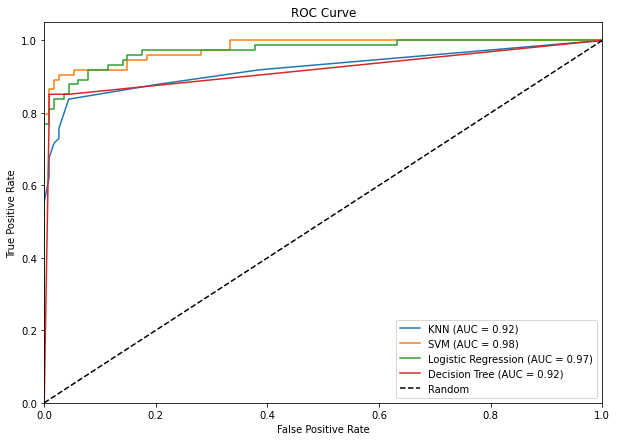

In [44]:
# Define a list of classifiers and their names
classifiers = [knn, svm,logreg , dt_classifier]
classifier_names = ["KNN", "SVM", "Logistic Regression", "Decision Tree"]

# Create a function to plot ROC curve and calculate AUC
def plot_roc_curve_and_auc(classifiers, classifier_names, X_test, y_test):
    plt.figure(figsize=(10, 7))
    for classifier, name in zip(classifiers, classifier_names):
        y_pred_prob = classifier.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        auc = roc_auc_score(y_test, y_pred_prob)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

    plt.plot([0, 1], [0, 1], 'k--', label="Random")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curves and calculate AUC for all classifiers
plot_roc_curve_and_auc(classifiers, classifier_names, X_test, y_test)

# The SVM model outperformed KNN, Logistic Regression and Decision Tree models with the highest AUC-ROC score of 0.98, showcasing its superior predictive ability for the dataset. Therefore, the SVM model is recommended for accurate classification in this context.